In [94]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [95]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [96]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [97]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [98]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [99]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [100]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [101]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [102]:
# Find the most recent date in the data set.
most_recent_date = (session.query(Measurement.date).order_by(Measurement.date.desc()).first())

print(f"The most recent date in the data set is {most_recent_date}.")

The most recent date in the data set is ('2017-08-23',).


One year ago date: 2016-08-22.


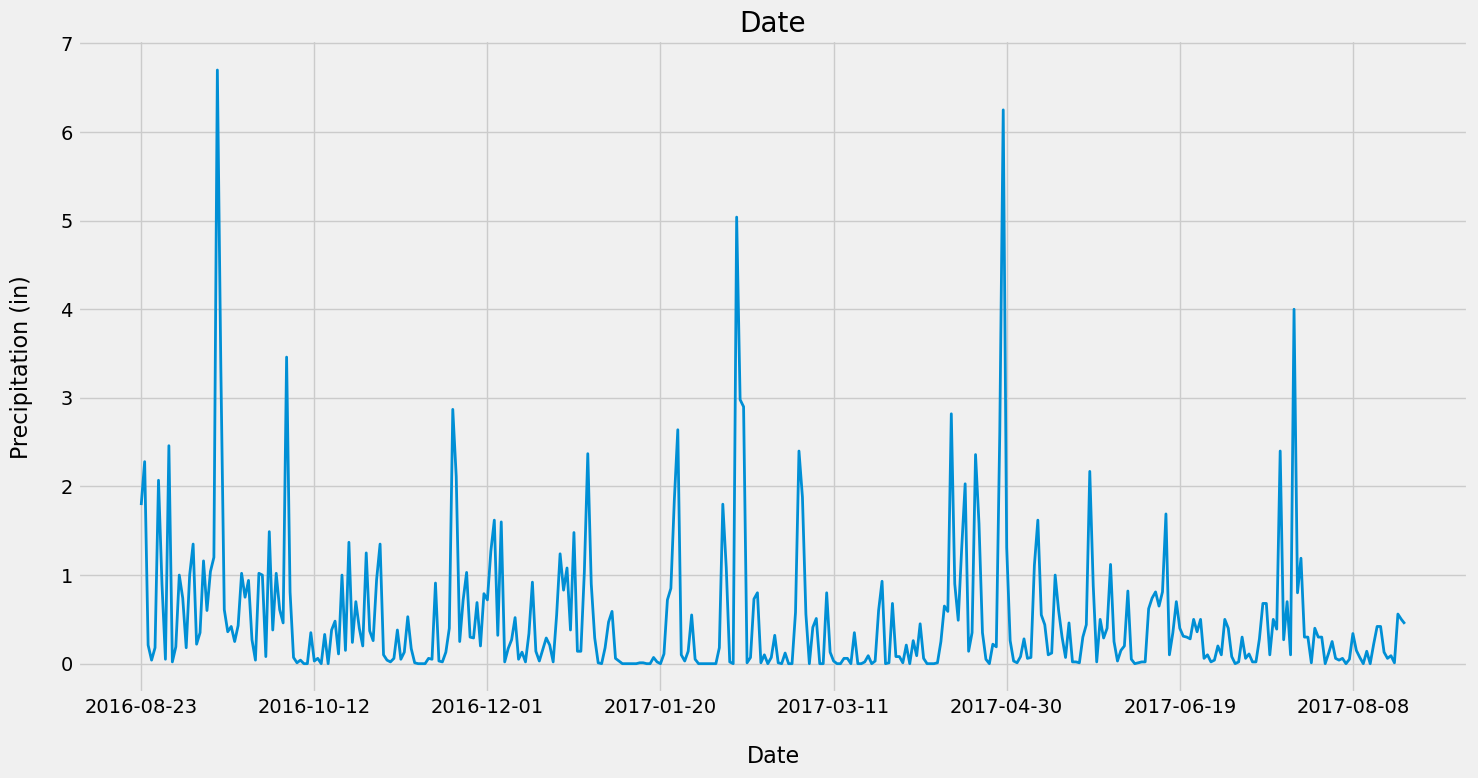

In [103]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago_date = dt.date(2017, 8, 23) - dt.timedelta(days=366)

print(f'One year ago date: {one_year_ago_date}.')

# Perform a query to retrieve the data and precipitation scores
prcp_data = (session.query(Measurement.date,func.max(Measurement.prcp)).filter(func.strftime('%Y-%m-%d',Measurement.date) > one_year_ago_date).group_by(Measurement.date).all())

prcp_data

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
prcp_df = pd.DataFrame(prcp_data, columns=['date', 'precipitation'])
prcp_df.set_index('date',inplace=True)

prcp_df

# Use Pandas Plotting with Matplotlib to plot the data
plt.rcParams['figure.figsize']=(15,8)
prcp_df.plot(linewidth=2,rot=0)
plt.xlabel('Date',fontsize=16,color='black',labelpad=20)
plt.ylabel('Precipitation (in)',fontsize=16,color='black',labelpad=20)
plt.title('Date')
plt.legend('',frameon=False)
plt.tight_layout()


plt.show()

In [104]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,366.000000
mean,0.520765
std,0.830728
min,0.000000
25%,0.040000
50%,0.250000
75%,0.672500
max,6.700000


# Exploratory Station Analysis

In [105]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()

print(f'There are {total_stations} stations at Honolulu, Hawaii.')

There are 9 stations at Honolulu, Hawaii.


In [106]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

for station, count in most_active_stations:
    print(f"Station {station} had {count} observations.")

Station USC00519281 had 2772 observations.
Station USC00519397 had 2724 observations.
Station USC00513117 had 2709 observations.
Station USC00519523 had 2669 observations.
Station USC00516128 had 2612 observations.
Station USC00514830 had 2202 observations.
Station USC00511918 had 1979 observations.
Station USC00517948 had 1372 observations.
Station USC00518838 had 511 observations.


In [114]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(Measurement.station).group_by(Measurement.station).order_by(func.count().desc()).first()[0]

results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()

temp_dict = {
    "Station": [most_active_station],
    "Lowest Temperature": [results[0][0]],
    "Highest Temperature": [results[0][1]],
    "Average Temperature": [results[0][2]]
}

temp_df = pd.DataFrame(temp_dict)


temp_df

,Station,Lowest Temperature,Highest Temperature,Average Temperature
0,USC00519281,54.0,85.0,71.663781


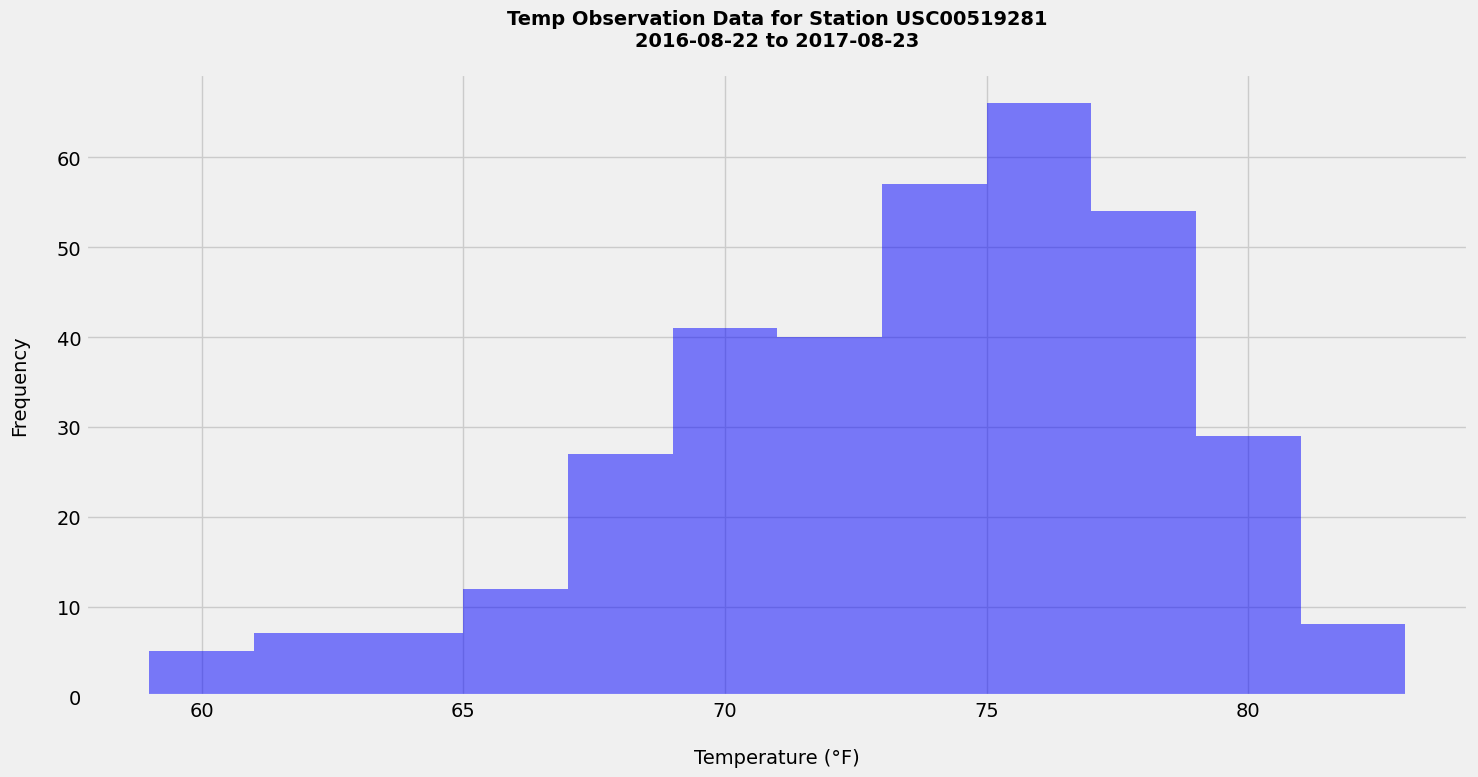

In [115]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(Measurement.tobs).filter(Measurement.station == most_active_station).filter(Measurement.date >= one_year_ago_date).all()

temps = list(np.ravel(temp_data))

plt.hist(temps, bins=12, color='blue', alpha=0.5)
plt.xlabel('Temperature (°F)',fontsize=14,color='black',labelpad=20)
plt.ylabel('Frequency',fontsize=14,color='black',labelpad=20)
plt.title(f'Temp Observation Data for Station {most_active_station}\n{one_year_ago_date} to {most_recent_date[0]}',fontsize=14,color='black',fontweight='bold',pad=20)
plt.tight_layout()


plt.show()

# Close session

In [109]:
# Close Session
session.close()